# **Time Series**

# **Data Preparation and Exploration**

## **Data Loading:**

In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')


In [45]:
# Show the first few rows to understand the structure
df.head()


,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


## **Initial Exploration:**

In [46]:
# Print the column names to check for 'USD_AUD' or similar
print(df.columns)

Index(['Ex_rate'], dtype='object')


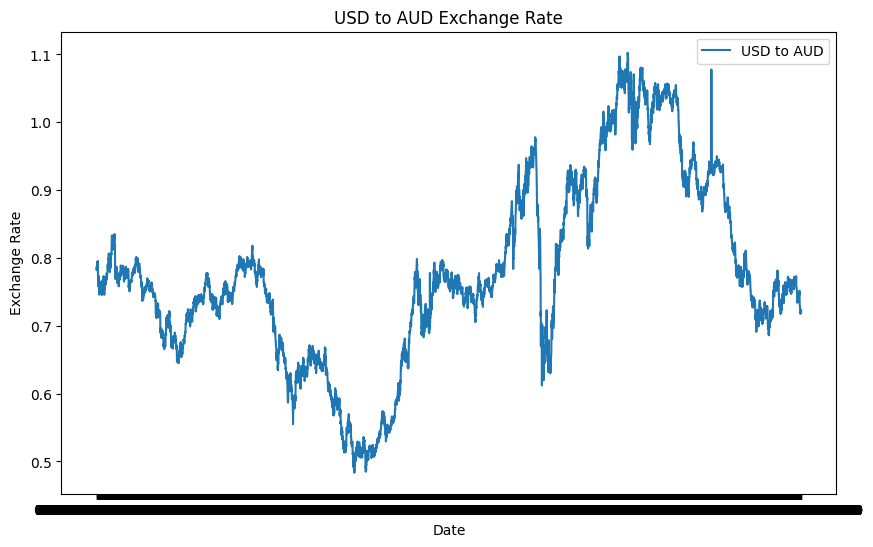

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')  # Changed to 'Ex_rate'
plt.title('USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# **Data Preprocessing:**

In [48]:
# Check for missing values
df.isnull().sum()

,0
Ex_rate,0


In [49]:
# If there are missing values, fill them using forward fill method or interpolation
df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill') # Changed 'USD_AUD' to 'Ex_rate'

<ipython-input-49-a02f141c30b2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill') # Changed 'USD_AUD' to 'Ex_rate'


In [50]:
# Optionally, remove rows with anomalies (e.g., negative exchange rates)
df = df[df['Ex_rate'] > 0] # Changed 'USD_AUD' to 'Ex_rate'

In [51]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


# Model Building - ARIMA

### **Parameter Selection for ARIMA:**

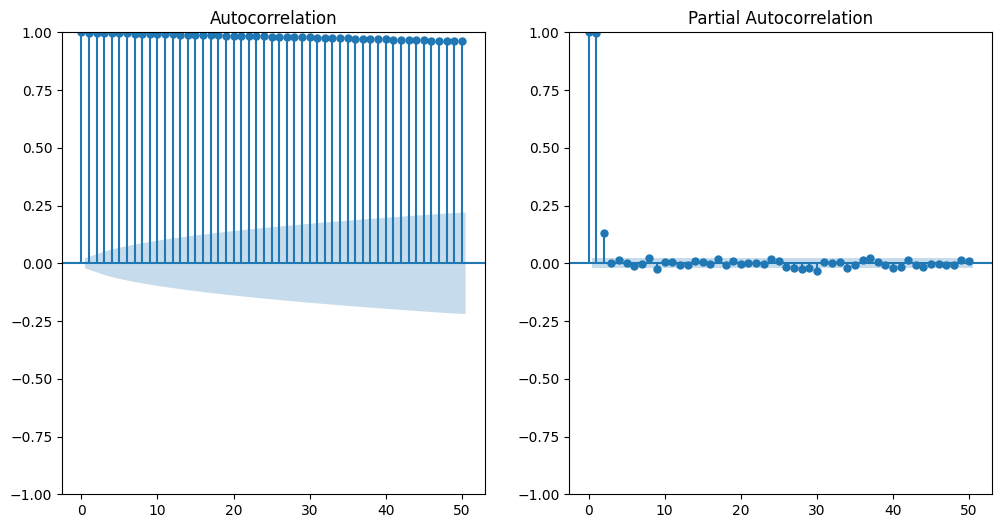

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the 'Ex_rate' series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.show()


### **Model Fitting:**

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with selected p, d, q values (e.g., p=1, d=1, q=1)
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [54]:
# the model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 20 Dec 2024   AIC                         -56102.322
Time:                        12:56:34   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Diagnostics:**

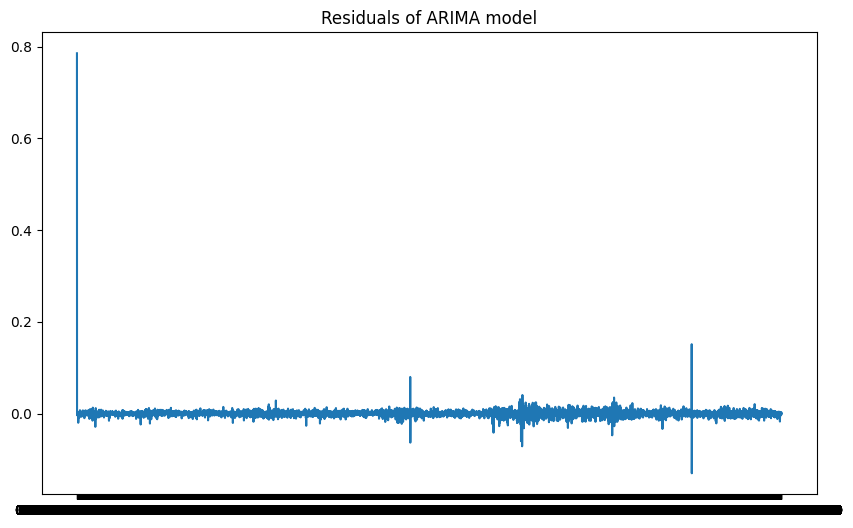

In [55]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA model')
plt.show()


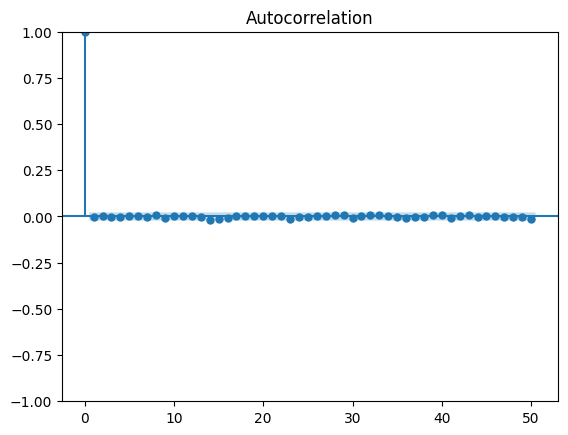

In [56]:
# ACF of residuals to check for autocorrelation
plot_acf(residuals, lags=50)
plt.show()


### **Forecasting:**

In [57]:
# Forecasting future values (e.g., next 30 days)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
import pandas as pd

# Load the dataset and specify the date format
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True, index_col='date')

# Check the data to ensure that the date is in the correct format
print(df.head())


            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


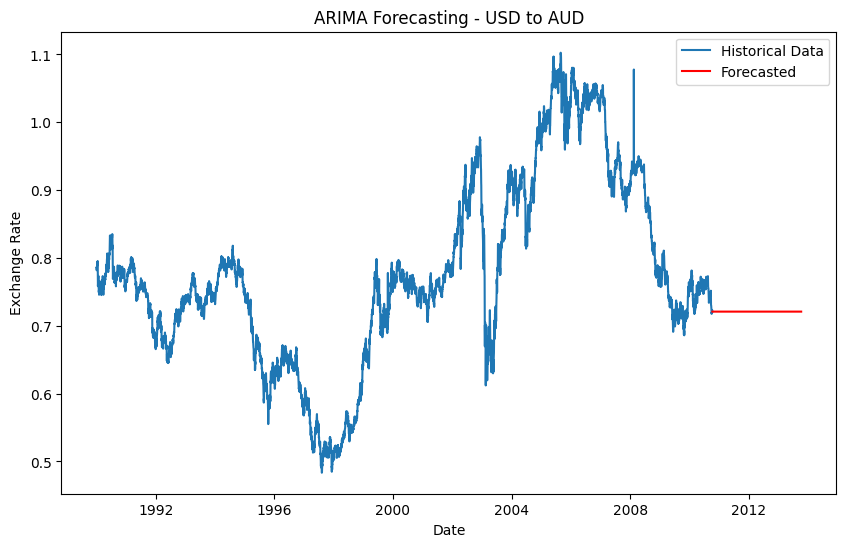

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecasting future values (e.g., next 3 years)
forecast_steps = 1095  # Number of days in 3 years (365 days per year)
forecast = model_fit.forecast(steps=forecast_steps)

# Ensure the last date in the dataset is a datetime object (if it's not already)
last_date = df.index[-1]

# Generate a date range for the forecast period, starting from the last date in the dataset
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='D')[1:]

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecasting - USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


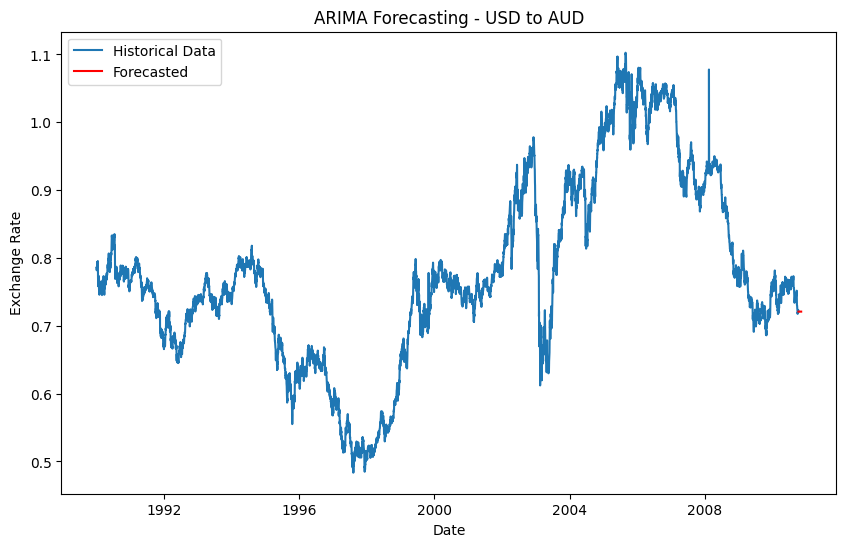

In [60]:
import matplotlib.pyplot as plt

# Forecasting future values (e.g., next 30 days)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Ensure the last date in the dataset is a datetime object (if it's not already)
last_date = df.index[-1]

# Generate a date range for the forecast period, starting from the last date in the dataset
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='D')[1:]

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecasting - USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [61]:
print("Data index dtype:", df.index.dtype)
print("Forecast dates dtype:", forecast_dates.dtype)


Data index dtype: datetime64[ns]
Forecast dates dtype: datetime64[ns]


# **Model Building - Exponential Smoothing**

### **Model Selection:**

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model (Seasonal, Trend, and Level)
model_hw = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_hw_fit = model_hw.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [63]:

# Print model summary
model_hw_fit.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77624.574
Trend:,Additive,BIC,-77513.625
Seasonal:,Additive,AICC,-77624.483
Seasonal Periods:,12,Date:,"Fri, 20 Dec 2024"
Box-Cox:,False,Time:,12:57:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8702071,alpha,True
smoothing_trend,3.2179e-19,beta,True


### **Model Fitting and Forecasting:**

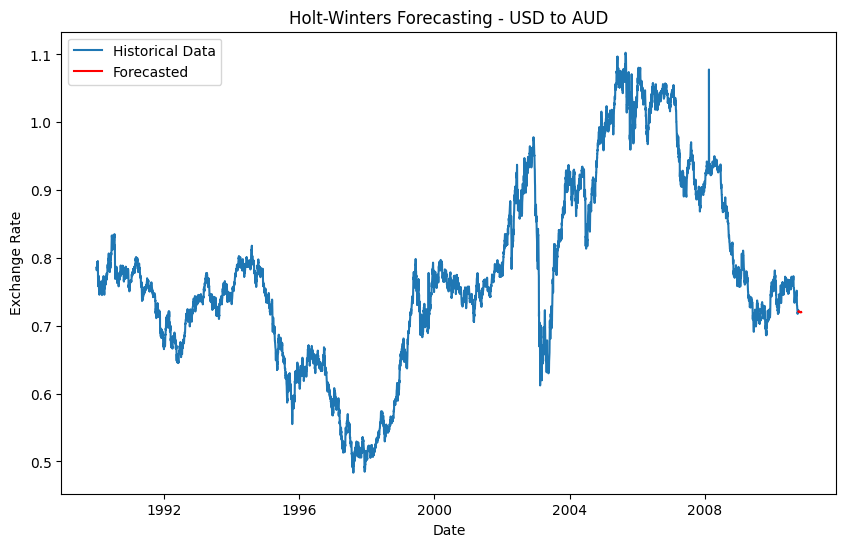

In [64]:
# Forecast future values using Holt-Winters model
forecast_hw = model_hw_fit.forecast(steps=forecast_steps)

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_hw, label='Forecasted', color='red')
plt.title('Holt-Winters Forecasting - USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


# **Evaluation and Comparison**

### **Compute Error Metrics:**

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values (for comparison)
actual_values = df['Ex_rate'].iloc[-forecast_steps:]

# MAE, RMSE, MAPE for ARIMA model
mae_arima = mean_absolute_error(actual_values, forecast)
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast))
mape_arima = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

# MAE, RMSE, MAPE for Holt-Winters model
mae_hw = mean_absolute_error(actual_values, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(actual_values, forecast_hw))
mape_hw = np.mean(np.abs((actual_values - forecast_hw) / actual_values)) * 100

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}%")


ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan%
Holt-Winters - MAE: 0.013017654522635458, RMSE: 0.017245999955208903, MAPE: nan%


<ipython-input-65-002d5084271b>:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_arima = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100


### **Model Comparison:**

**Best Model for Exchange Rates**: **ARIMA** is the preferred model for forecasting exchange rates, especially when the data shows strong autoregressive patterns and trends. Its ability to capture complex dependencies makes it better suited for this task.

**Considerations for Holt-Winters:** **Holt-Winters** might still be a viable option if the data has clear seasonal components and simple trends, especially when model simplicity and speed are crucial.

**Model Selection:** It is important to test multiple models and validate them on out-of-sample data before finalizing the best model. A combination of both models could even be explored in a hybrid approach, leveraging the strengths of each.


### **Conclusion:**

**In summary, ARIMA is more flexible and precise for forecasting exchange rates in this dataset, though it requires more careful tuning. The Holt-Winters method provides a simpler and faster alternative but is less accurate in this specific case.**